# Análisis de Reflectancia en Películas Delgadas de Aluminio

## Espectroscopia de Reflectancia a Múltiples Ángulos (30°, 45°, 60°)

En este notebook se analiza la reflectancia relativa de una película delgada de aluminio medida a diferentes ángulos de incidencia utilizando un espectrómetro Thorlabs CCS-100.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Configuración de matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Paso 1: Cargar Datos Experimentales

Los datos se obtuvieron del espectrómetro Thorlabs CCS-100 con las siguientes mediciones:
- **r (Reference)**: Espectro del estándar especular (referencia)
- **dr (Dark Reference)**: Espectro oscuro de la referencia
- **Rmuestra (Sample)**: Espectro de la película delgada de aluminio
- **Dsample (Dark Sample)**: Espectro oscuro de la muestra

In [12]:
# Función para cargar archivos CSV del espectrómetro Thorlabs
def load_thorlabs_csv(filepath):
    """
    Carga un archivo CSV del espectrómetro Thorlabs, 
    extrayendo los datos después de la sección [Data]
    """
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    # Encontrar la línea [Data]
    data_start = None
    data_end = None
    for i, line in enumerate(lines):
        if '[Data]' in line:
            data_start = i + 1
        elif '[EndOfFile]' in line:
            data_end = i
            break
    
    if data_start is None:
        raise ValueError("No se encontró la sección [Data] en el archivo")
    
    # Leer solo las líneas de datos
    if data_end is None:
        data_lines = lines[data_start:]
    else:
        data_lines = lines[data_start:data_end]
    
    # Crear un string con los datos y leerlo con pandas
    from io import StringIO
    data_str = ''.join(data_lines)
    
    df = pd.read_csv(StringIO(data_str), sep=';', header=None, 
                     names=['Wavelength (nm)', 'Intensity'],
                     dtype={'Wavelength (nm)': float, 'Intensity': float})
    
    return df

# Definir rutas y ángulos
data_dir = Path('/home/juan/Workspace/Base/Python/Lab2/thin_films')
angles = [30, 45, 60]

# Cargar todos los datos
spectra = {}

for angle in angles:
    spectra[angle] = {
        'r': load_thorlabs_csv(data_dir / f'r{angle}.csv'),
        'dr': load_thorlabs_csv(data_dir / f'dr{angle}.csv'),
        'sample': load_thorlabs_csv(data_dir / f'Rmuestra-{angle}G-G2.csv'),
        'dsample': load_thorlabs_csv(data_dir / f'Dsample-{angle}G-G2.csv')
    }

# Mostrar información de los datos cargados
print("Datos cargados exitosamente para los ángulos:", angles)
for angle in angles:
    print(f"\nÁngulo {angle}°:")
    for key in spectra[angle]:
        print(f"  {key}: {len(spectra[angle][key])} puntos de medición")

Datos cargados exitosamente para los ángulos: [30, 45, 60]

Ángulo 30°:
  r: 3648 puntos de medición
  dr: 3648 puntos de medición
  sample: 3648 puntos de medición
  dsample: 3648 puntos de medición

Ángulo 45°:
  r: 3648 puntos de medición
  dr: 3648 puntos de medición
  sample: 3648 puntos de medición
  dsample: 3648 puntos de medición

Ángulo 60°:
  r: 3648 puntos de medición
  dr: 3648 puntos de medición
  sample: 3648 puntos de medición
  dsample: 3648 puntos de medición


## Paso 2: Calcular Reflectancia Relativa

La reflectancia relativa se calcula usando la fórmula:

$$R(\lambda) = \frac{S(\lambda) - D_s(\lambda)}{R(\lambda) - D_r(\lambda)}$$

Donde:
- $S(\lambda)$: Intensidad del espectro de la muestra
- $D_s(\lambda)$: Intensidad del espectro oscuro de la muestra
- $R(\lambda)$: Intensidad del espectro de referencia
- $D_r(\lambda)$: Intensidad del espectro oscuro de la referencia

In [13]:
# Calcular reflectancia relativa para cada ángulo
reflectance = {}

for angle in angles:
    # Obtener datos
    S = spectra[angle]['sample']['Intensity'].values
    Ds = spectra[angle]['dsample']['Intensity'].values
    R = spectra[angle]['r']['Intensity'].values
    Dr = spectra[angle]['dr']['Intensity'].values
    wavelength = spectra[angle]['sample']['Wavelength (nm)'].values
    
    # Calcular reflectancia relativa: (S - Ds) / (R - Dr)
    R_rel = (S - Ds) / (R - Dr)
    
    # Guardar resultados
    reflectance[angle] = pd.DataFrame({
        'Wavelength (nm)': wavelength,
        'Reflectance': R_rel
    })
    
    print(f"\nÁngulo {angle}°:")
    print(f"  Reflectancia relativa - Mín: {R_rel.min():.4f}, Máx: {R_rel.max():.4f}")
    print(f"  Media: {R_rel.mean():.4f}")


Ángulo 30°:
  Reflectancia relativa - Mín: -19.0030, Máx: 22.3235
  Media: 0.2789

Ángulo 45°:
  Reflectancia relativa - Mín: -66.7761, Máx: 81.3027
  Media: 0.4708

Ángulo 60°:
  Reflectancia relativa - Mín: -387.1383, Máx: 210.1341
  Media: 0.4789


## Paso 3: Visualizar Reflectancia Relativa

Gráficas de la reflectancia relativa medida a los tres ángulos de incidencia.

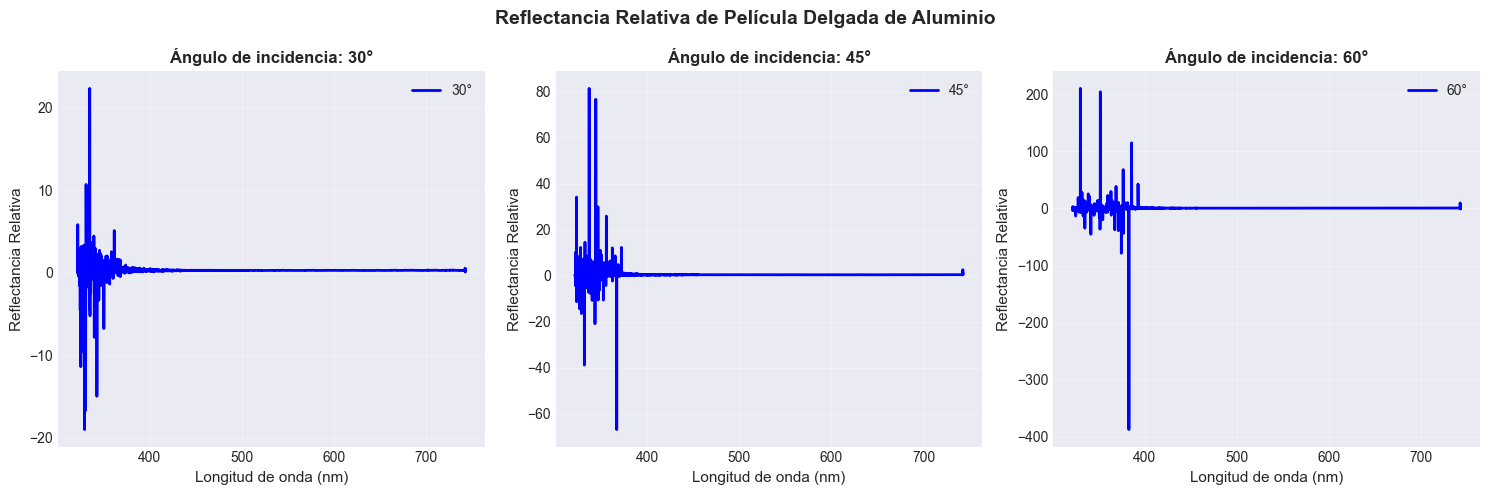

In [14]:
# Gráfica individual para cada ángulo
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Reflectancia Relativa de Película Delgada de Aluminio', fontsize=14, fontweight='bold')

for idx, angle in enumerate(angles):
    ax = axes[idx]
    wavelength = reflectance[angle]['Wavelength (nm)'].values
    R_rel = reflectance[angle]['Reflectance'].values
    
    ax.plot(wavelength, R_rel, 'b-', linewidth=2, label=f'{angle}°')
    ax.set_xlabel('Longitud de onda (nm)', fontsize=11)
    ax.set_ylabel('Reflectancia Relativa', fontsize=11)
    ax.set_title(f'Ángulo de incidencia: {angle}°', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

## Paso 4: Comparativa de Reflectancia a Diferentes Ángulos

Gráfica superpuesta de los tres ángulos para analizar cómo varía la reflectancia con el ángulo de incidencia.

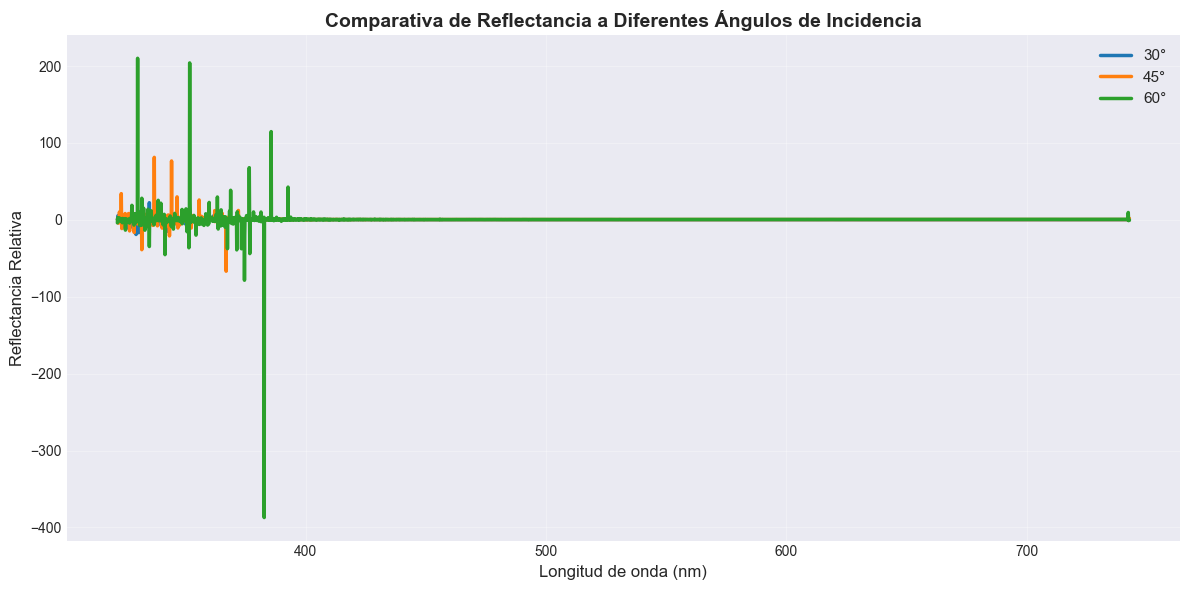

In [15]:
# Gráfica superpuesta de los tres ángulos
plt.figure(figsize=(12, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx, angle in enumerate(angles):
    wavelength = reflectance[angle]['Wavelength (nm)'].values
    R_rel = reflectance[angle]['Reflectance'].values
    plt.plot(wavelength, R_rel, linewidth=2.5, label=f'{angle}°', color=colors[idx])

plt.xlabel('Longitud de onda (nm)', fontsize=12)
plt.ylabel('Reflectancia Relativa', fontsize=12)
plt.title('Comparativa de Reflectancia a Diferentes Ángulos de Incidencia', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Paso 5: Análisis Estadístico de Reflectancia

Estadísticas descriptivas de la reflectancia relativa en función del ángulo de incidencia.

In [16]:
# Crear tabla de estadísticas
stats_data = []

for angle in angles:
    R_rel = reflectance[angle]['Reflectance'].values
    stats_data.append({
        'Ángulo (°)': angle,
        'Mínimo': R_rel.min(),
        'Máximo': R_rel.max(),
        'Media': R_rel.mean(),
        'Desv. Est.': R_rel.std(),
        'Mediana': np.median(R_rel)
    })

stats_df = pd.DataFrame(stats_data)
print("\nEstadísticas de Reflectancia Relativa por Ángulo:")
print(stats_df.to_string(index=False))


Estadísticas de Reflectancia Relativa por Ángulo:
 Ángulo (°)      Mínimo     Máximo    Media  Desv. Est.  Mediana
         30  -19.003027  22.323527 0.278917    0.793476 0.273884
         45  -66.776067  81.302728 0.470821    2.653014 0.401081
         60 -387.138258 210.134106 0.478853    8.828924 0.512780


## Paso 6: Análisis de Comportamiento Espectral

Estudio detallado de cómo varía la reflectancia en diferentes regiones espectrales.

In [17]:
# Análisis de regiones espectrales
# Dividir en regiones: UV (300-400), Visible (400-700), IR cercano (700-1000)

regions = {
    'UV': (300, 400),
    'Visible': (400, 700),
    'IR Cercano': (700, 1000)
}

print("\n" + "="*70)
print("ANÁLISIS POR REGIÓN ESPECTRAL")
print("="*70)

for angle in angles:
    print(f"\n{'Ángulo: '+str(angle)+'°':^70}")
    print("-"*70)
    
    wavelength = reflectance[angle]['Wavelength (nm)'].values
    R_rel = reflectance[angle]['Reflectance'].values
    
    for region_name, (wmin, wmax) in regions.items():
        mask = (wavelength >= wmin) & (wavelength < wmax)
        if mask.any():
            R_region = R_rel[mask]
            print(f"  {region_name:12} ({wmin:3d}-{wmax:3d} nm): "
                  f"Media = {R_region.mean():.4f}, Std = {R_region.std():.4f}")
        else:
            print(f"  {region_name:12}: No hay datos en este rango")


ANÁLISIS POR REGIÓN ESPECTRAL

                             Ángulo: 30°                              
----------------------------------------------------------------------
  UV           (300-400 nm): Media = 0.3019, Std = 1.7942
  Visible      (400-700 nm): Media = 0.2718, Std = 0.0176
  IR Cercano   (700-1000 nm): Media = 0.2844, Std = 0.0227

                             Ángulo: 45°                              
----------------------------------------------------------------------
  UV           (300-400 nm): Media = 0.7518, Std = 5.9920
  Visible      (400-700 nm): Media = 0.4006, Std = 0.0226
  IR Cercano   (700-1000 nm): Media = 0.4165, Std = 0.1265

                             Ángulo: 60°                              
----------------------------------------------------------------------
  UV           (300-400 nm): Media = 0.2809, Std = 19.9652
  Visible      (400-700 nm): Media = 0.5071, Std = 0.0956
  IR Cercano   (700-1000 nm): Media = 0.6683, Std = 0.4878


## Paso 7: Variación de la Reflectancia con el Ángulo de Incidencia

Análisis de cómo cambia la reflectancia a una longitud de onda específica cuando varía el ángulo de incidencia.

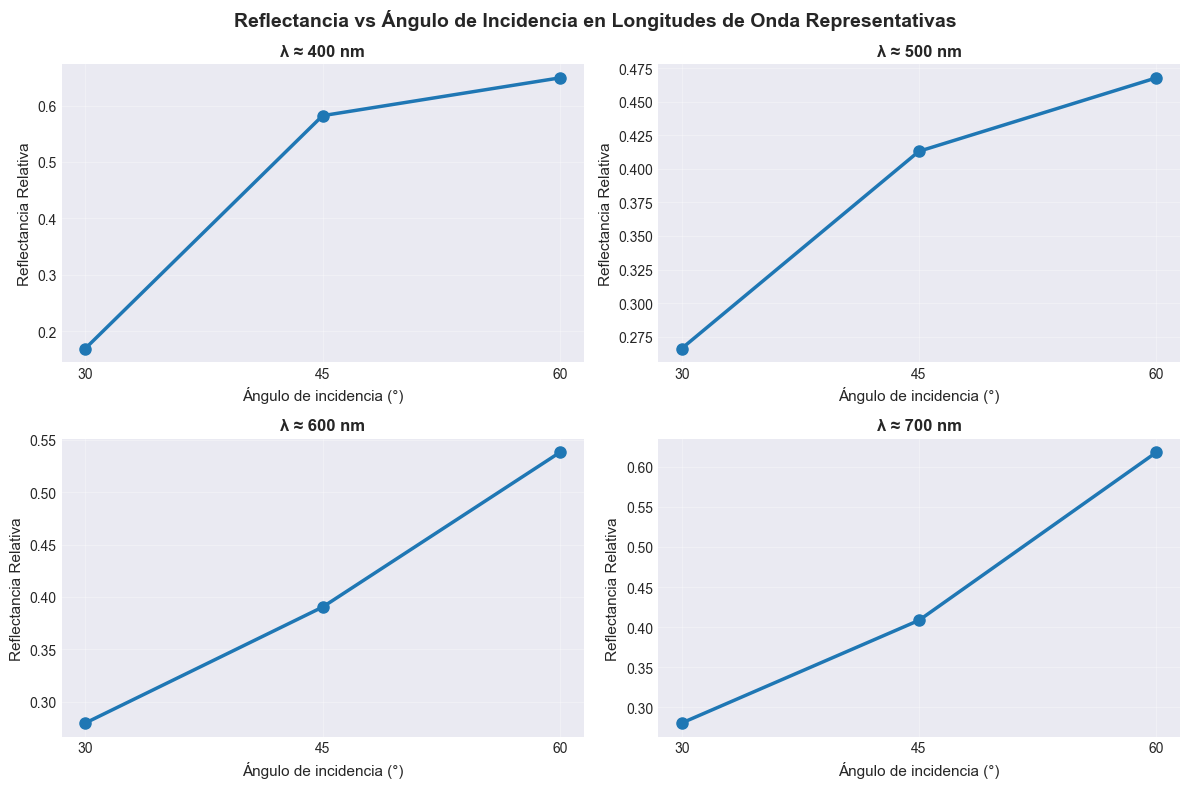

In [18]:
# Seleccionar longitudes de onda representativas para analizar la dependencia angular
representative_wavelengths = [400, 500, 600, 700]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

fig.suptitle('Reflectancia vs Ángulo de Incidencia en Longitudes de Onda Representativas', 
             fontsize=14, fontweight='bold')

for idx, wavelength_target in enumerate(representative_wavelengths):
    ax = axes[idx]
    angular_data = []
    
    for angle in angles:
        # Encontrar el índice de la longitud de onda más cercana
        wl = reflectance[angle]['Wavelength (nm)'].values
        idx_wl = np.argmin(np.abs(wl - wavelength_target))
        R_at_wl = reflectance[angle]['Reflectance'].values[idx_wl]
        angular_data.append(R_at_wl)
    
    ax.plot(angles, angular_data, 'o-', linewidth=2.5, markersize=8, color='#1f77b4')
    ax.set_xlabel('Ángulo de incidencia (°)', fontsize=11)
    ax.set_ylabel('Reflectancia Relativa', fontsize=11)
    ax.set_title(f'λ ≈ {wavelength_target} nm', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xticks(angles)

plt.tight_layout()
plt.show()